# 第 3 章：TensorFlow

In [1]:
# 导入 tensorflow
import tensorflow as tf

# 查看 tensorflow 版本
print(tf.__version__)

1.10.0


## 张量 Tensor

### 创建 Tensor

In [2]:
# 0 阶 Tensor
c0 = tf.constant(2, name='c0')
# 1 阶 Tensor
c1 = tf.constant([1, 2, 3], name='c1')
# 2 阶 Tensor
c2 = tf.constant([[1, 2], [3, 4]], name='c2')

In [3]:
print(c0)
print(c1)
print(c2)

Tensor("c0:0", shape=(), dtype=int32)
Tensor("c1:0", shape=(3,), dtype=int32)
Tensor("c2:0", shape=(2, 2), dtype=int32)


### Tensor数学运算

In [4]:
a = tf.constant([[1, 2], [3, 4]], name='a')
b = tf.constant([[5, 6], [7, 8]], name='b')
# 加法
out = tf.add(a, b, name='add')
print(out)
# 减法
out = tf.subtract(a, b, name='sub')
print(out)
# 对应元素相乘
out = tf.multiply(a, b, name='multiply')
print(out)
# 矩阵相乘
out = tf.matmul(a, b, name='matmul')
print(out)

Tensor("add:0", shape=(2, 2), dtype=int32)
Tensor("sub:0", shape=(2, 2), dtype=int32)
Tensor("multiply:0", shape=(2, 2), dtype=int32)
Tensor("matmul:0", shape=(2, 2), dtype=int32)


## 数据流图（Data Flow Graph）

![](./datasets/ch03/3-3.png)

In [5]:
c = tf.constant(2, name='const')

a = tf.Variable(3, name='a')
b = tf.Variable(4, name='b')

f = a*a + a*b +c

## 会话（Session）

### 会话机制 1 

In [6]:
sess = tf.Session()
sess.run(a.initializer)
sess.run(b.initializer)
result = sess.run(f)
print(result)

sess.close()

23


### 会话机制 2

In [7]:
with tf.Session() as sess:
    a.initializer.run()
    b.initializer.run()
    result = f.eval()
print(result)

23


### 会话机制 3

In [8]:
init = tf.global_variables_initializer()    # 定义全局初始化节点

with tf.Session() as sess:
    init.run()    # 初始化所有变量
    result = f.eval()

### 占位符 tf.placeholder()

In [9]:
# 在 Tensorflow 中需要定义 placeholder 的 type，一般为 float32
a = tf.placeholder(tf.float32, name='a')
b = tf.placeholder(tf.float32, name='b')
f = tf.multiply(a, b)

with tf.Session() as sess:
    print('Situation 1:\n', sess.run(f, feed_dict={a: [3.], b: [4.]}))
    print('Situation 2:\n',sess.run(f, feed_dict={a:[[1.,2.],[3.,4.]], b: [2.]}))

Situation 1:
 [12.]
Situation 2:
 [[2. 4.]
 [6. 8.]]


## TensorFlow 线性回归

In [10]:
import numpy as np
import matplotlib.pyplot as plt

### 创建数据集

In [11]:
x_train = np.linspace(-1, 1, 50)
y_train = 3*x_train + 10 + 0.5 * np.random.randn(x_train.shape[0])

显示数据分布

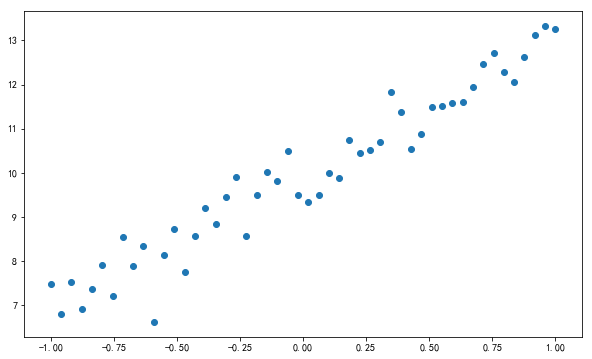

In [12]:
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False
plt.rcParams['figure.figsize'] = (10.0, 6.0) # set default size of plots

plt.scatter(x_train, y_train)
plt.show()

### 创建输入节点 x 和 y，用于输入数据

In [13]:
x = tf.placeholder(tf.float32, name='x')
y = tf.placeholder(tf.float32, name='y')

### 创建变量节点 w1 和 w0，并初始化变量

In [14]:
w1 = tf.Variable(tf.random_normal([1]), name='w1')
w0 = tf.Variable(tf.zeros([1]), name='w0')

### 创建线性模型

In [15]:
y_hat = w0 + w1 * x

### 创建损失模型

In [16]:
loss = tf.reduce_mean(tf.square(y_hat - y))

### 创建一个梯度下降优化器

In [17]:
optimizer = tf.train.GradientDescentOptimizer(0.01)    # 学习率设为 0.01
train = optimizer.minimize(loss)

### 创建会话 Session 用来计算模型

In [18]:
sess = tf.Session()

### 初始化变量

In [19]:
init = tf.global_variables_initializer()
sess.run(init)
print ("w1 =", sess.run(w1), "w0 =", sess.run(w0))  # 打印初始化的w1和w0

w1 = [-0.4311598] w0 = [0.]


### 训练

In [20]:
num_iter = 500
for i in range(num_iter):
    sess.run(train, {x: x_train, y: y_train})
    if (i+1) % 20 == 0:
        print('Iteration[{}/{}], loss: {:.6f}'.format(i+1,num_iter,sess.run(loss,{x:x_train,y:y_train})))

Iteration[20/500], loss: 47.436157
Iteration[40/500], loss: 22.252466
Iteration[60/500], loss: 10.788024
Iteration[80/500], loss: 5.496624
Iteration[100/500], loss: 3.000713
Iteration[120/500], loss: 1.784191
Iteration[140/500], loss: 1.163201
Iteration[160/500], loss: 0.826786
Iteration[180/500], loss: 0.631707
Iteration[200/500], loss: 0.510594
Iteration[220/500], loss: 0.430753
Iteration[240/500], loss: 0.375594
Iteration[260/500], loss: 0.336194
Iteration[280/500], loss: 0.307420
Iteration[300/500], loss: 0.286107
Iteration[320/500], loss: 0.270183
Iteration[340/500], loss: 0.258223
Iteration[360/500], loss: 0.249212
Iteration[380/500], loss: 0.242410
Iteration[400/500], loss: 0.237269
Iteration[420/500], loss: 0.233382
Iteration[440/500], loss: 0.230442
Iteration[460/500], loss: 0.228216
Iteration[480/500], loss: 0.226533
Iteration[500/500], loss: 0.225258


打印 w1

In [21]:
sess.run(w1)

array([2.938043], dtype=float32)

打印 w0

In [22]:
sess.run(w0)

array([9.940149], dtype=float32)

### 模型测试

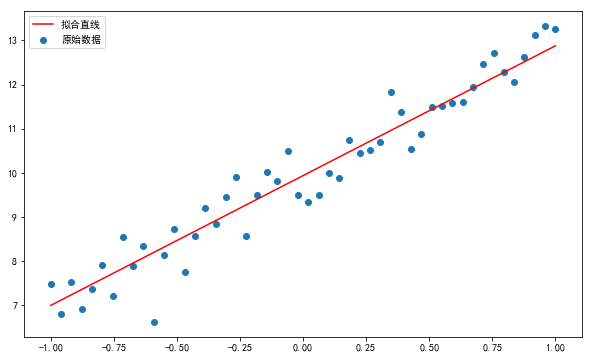

In [23]:
y_hat = sess.run(y_hat, {x: x_train, y: y_train})    # 模型的预测输出
plt.scatter(x_train, y_train, label='原始数据')
plt.plot(x_train, y_hat, c='r', label='拟合直线')
# 显示图例
plt.legend() 
plt.show()

### 关闭会话& 图复位

In [24]:
sess.close()    # 关闭会话 Session
tf.reset_default_graph()    # 图复位

## TensorBoard

### 创建日志存放目录

In [25]:
from datetime import  datetime

now = datetime.utcnow().strftime('%Y%m%d%H%M%S')
root_logdir = 'tf_logs'
logdir = '{}/ch03/run-{}'.format(root_logdir, now)

### 构建计算图

In [26]:
x = tf.placeholder(tf.float32, name='x')
y = tf.placeholder(tf.float32, name='y')
w1 = tf.Variable(tf.random_normal([1]), name='w1')
w0 = tf.Variable(tf.zeros([1]), name='w0')
y_hat = w0 + w1 * x
loss = tf.reduce_mean(tf.square(y_hat - y))
optimizer = tf.train.GradientDescentOptimizer(0.01)    # 学习率设为 0.01
train = optimizer.minimize(loss)

### 设置 TensorBoard

In [27]:
# 给损失模型的输出添加scalar，用来观察loss的收敛曲线
loss_summary = tf.summary.scalar('loss', loss)
# 模型运行产生的所有数据保存到文件夹供 TensorBoard 使用
file_writer = tf.summary.FileWriter(logdir, tf.get_default_graph())

### 会话 Session

In [28]:
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

num_iter = 500
for i in range(num_iter):
    # 训练时传入loss_summary
    summary, _ = sess.run([loss_summary, train], {x: x_train, y: y_train})
    # 收集每次训练产生的数据
    file_writer.add_summary(summary, i)
    if (i+1) % 20 == 0:
        print('Iteration[{}/{}], loss: {:.6f}'.format(i+1,num_iter,sess.run(loss,{x:x_train,y:y_train})))

Iteration[20/500], loss: 49.139008
Iteration[40/500], loss: 23.541363
Iteration[60/500], loss: 11.763593
Iteration[80/500], loss: 6.235038
Iteration[100/500], loss: 3.559620
Iteration[120/500], loss: 2.207230
Iteration[140/500], loss: 1.483401
Iteration[160/500], loss: 1.069147
Iteration[180/500], loss: 0.815151
Iteration[200/500], loss: 0.649443
Iteration[220/500], loss: 0.535848
Iteration[240/500], loss: 0.455141
Iteration[260/500], loss: 0.396404
Iteration[280/500], loss: 0.352993
Iteration[300/500], loss: 0.320601
Iteration[320/500], loss: 0.296292
Iteration[340/500], loss: 0.277985
Iteration[360/500], loss: 0.264170
Iteration[380/500], loss: 0.253731
Iteration[400/500], loss: 0.245839
Iteration[420/500], loss: 0.239868
Iteration[440/500], loss: 0.235351
Iteration[460/500], loss: 0.231933
Iteration[480/500], loss: 0.229345
Iteration[500/500], loss: 0.227387
